In [1]:
!pip install --upgrade pip
!pip install --upgrade scikit-learn==0.23.0

     |████████████████████████████████| 1.6 MB 7.6 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 7.3 MB 6.5 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
exp_disp = 0.8 + 14 % 10 / 100
classa = 14 % 9
print(exp_disp)
print(classa)

0.8400000000000001
5


11501568/11490434 [==============================] - 0s 0us/step


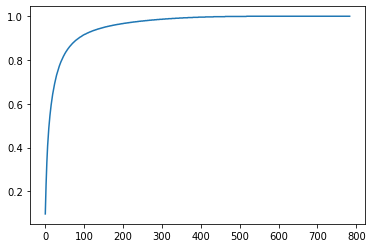

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from keras.datasets import mnist

(X_train, y_train), (X_pred, y_pred) = mnist.load_data()

dim = 784 # 28*28 
X_train_ = X_train.reshape(len(X_train), dim)

pca = PCA(svd_solver='full')
pca = pca.fit(X_train_)

explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
plt.plot(np.arange(dim), explained_variance, ls = '-')


Количество главных компонент, чтобы доля объяснённой дисперсии превышала 0.8400000000000001: 55
Количество верно классифицированных объектов класса 5: 491


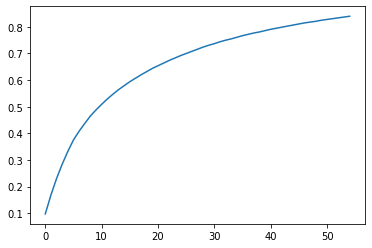

In [4]:
M = 0
for arg, val in enumerate(np.cumsum(pca.explained_variance_ratio_)):
  if val > exp_disp:
    M = arg + 1
    break

M = 55

print("Количество главных компонент, чтобы доля объяснённой дисперсии превышала " + str(exp_disp) + ": " + str(M))

X_train = X_train.reshape(len(X_train), dim)
pca = PCA(n_components=M, svd_solver='full')
pca = pca.fit(X_train)

explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
plt.plot(np.arange(M), explained_variance, ls = '-')

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=2020)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

modelPCA = pca.fit(X_test) 
X_test = modelPCA.transform(X_test)

tree = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=2020)
clf = OneVsRestClassifier(tree).fit(X_train, y_train)
y_pred = clf.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
print("Количество верно классифицированных объектов класса " + str(classa) + ": " +
          str(CM[classa][classa]))


In [5]:
imgs = [1337, 228, 1488, 322, 17]
for img in imgs:
  print(f"Вероятность отнесение изображения №{img} к назначеному классу {y_pred[img]} = {clf.predict_proba(X_test)[img][y_pred[img]]}")

Вероятность отнесение изображения №1337 к назначеному классу 4 = 0.39666211925145545
Вероятность отнесение изображения №228 к назначеному классу 5 = 0.39527721084665507
Вероятность отнесение изображения №1488 к назначеному классу 3 = 0.49566044734438935
Вероятность отнесение изображения №322 к назначеному классу 2 = 0.34805117748193815
Вероятность отнесение изображения №17 к назначеному классу 6 = 0.36156402440732577


In [6]:
from sklearn.metrics import classification_report, accuracy_score
target_names = ['class 0', 'class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.5766111111111111
              precision    recall  f1-score   support

     class 0       0.75      0.81      0.78      1693
     class 1       0.91      0.80      0.85      2075
     class 2       0.36      0.50      0.42      1763
     class 3       0.64      0.78      0.70      1873
     class 4       0.62      0.71      0.66      1756
     class 5       0.37      0.31      0.34      1591
     class 6       0.35      0.25      0.29      1766
     class 7       0.74      0.75      0.74      1886
     class 8       0.39      0.36      0.38      1773
     class 9       0.57      0.42      0.48      1824

    accuracy                           0.58     18000
   macro avg       0.57      0.57      0.56     18000
weighted avg       0.58      0.58      0.57     18000

